# Estimation Paths

In this post I attempt to replicate the estimation path plots show in the [Lyst AB Testing](https://making.lyst.com/2014/05/10/bayesian-ab-testing/) page.

In their plots they simulate a coin toss by drawing samples from a Bernoulli distribution (1 = heads, 0 = tails). They then calculate the probability of heads and thus the probability of tails and take the difference. They repeat this 500 times updating the previous probability until they reach 500 observations. These plots aim to show how the frequentist estimates are highly variable, where as Bayesian estimate remain close to the prior.

Here, I will also simulate the estimation paths using coin tosses. After each iteration the probability of a successful result (heads) is calculated along with the probability of tails (1 - P(heads)) and the difference taken. In an ideal situation as the number of iterations / samples increase we should see the difference approach zero.

To generate coin toss data I will be sampling from a Bernoulli distribution with `np.random.binomial(1, 0.5, n_samples)` where a successful result is equal to one (heads) and the probability of a successful result is 0.5 (fair coin) and the experiment is repeated up to `n_iterations`.

Each experiment below will be repeated 20 times with 500 interations / samples in each and the probaility difference of all 20 experiments plotted in a single plot.

In [1]:
# Import the required modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

In [2]:
n_iterations = 500
x = np.arange(n_iterations)

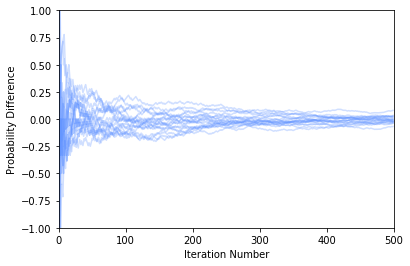

In [3]:
n_iterations = 500
for _ in range(20):
    tosses = np.random.binomial(1, 0.5, n_iterations)
    difference = np.array([])
    for i, val in enumerate(tosses):
        prob_head = np.sum(tosses[:i + 1]) / len(tosses[:i + 1])
        prob_differnce = prob_head - (1 - prob_head)
        difference = np.append(difference, [prob_differnce]) 
    plt.plot(x, difference, 'k', alpha=0.3, color='#6596ff')
        
plt.ylim([-1, 1])
plt.xlim([0, n_iterations])
plt.xlabel('Iteration Number')
plt.ylabel('Probability Difference')
plt.show()

We can see the probability difference wildly fluctuates at the beginning of the experiments and then become more stable as the experiment progresses

## Bayesian Path

Looking at the Bayesian estimation path, we should see an improvement over the frequentist path, only when the priors are strong/informative. I will be using a beta distribution to update as the simulation progresses and then obtain a posterior probability of heads. To obtain the probability of a head it can be calculated by simply doing:
- alpha param / (alpha param + beta param)
- e.g. 2 / (2 + 2) = 0.5

Which will obtain the mean value of the distribution.

To update the parameters, we simply add 1 to the `alpha param` value if we get head or add 1 to `beta param` value if we get a tail. I have created a [notebook](https://github.com/harpalsahota/DataScience/blob/master/AB_testing/Beta_Distribution/updating_the_beta_distribution.md) which explains this further.

Let's start with weak priors where the mean will be 0.5:
- alpha param: 2
- beta param: 2

In [4]:
# Define the Params
n_samples = 500
alpha_param, beta_param = 2, 2
x = np.arange(n_samples)
beta_linspace = np.linspace(0, 1)

In [5]:
# mean should be 0.5
mean, var = beta.stats(alpha_param, beta_param)
mean

array(0.5)

Plot the beta distribution

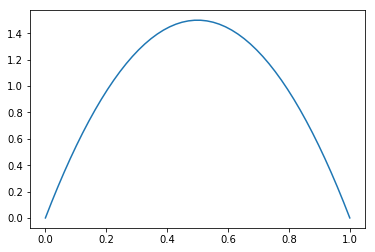

In [6]:
plt.plot(
    beta_linspace, 
    beta.pdf(beta_linspace, alpha_param, beta_param)
)
plt.show()

Having a weak prior results in a very wide distribution. This is due to a lack of evidence, meaning we are less certain where the probability of a heads lies. 

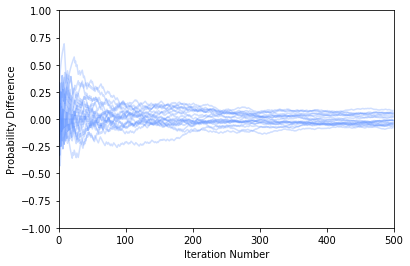

In [7]:
# Run the simulation
for _ in range(20):
    tosses = np.random.binomial(1, 0.5, n_samples)
    difference = np.array([])
    for val in tosses:
        if val == 1:
            alpha_param += 1
        else:
            beta_param += 1
        
        prob_head = alpha_param / (alpha_param + beta_param)
        prob_differnce = prob_head - (1 - prob_head)
        difference = np.append(difference, [prob_differnce])
    alpha_param, beta_param = 2, 2
    plt.plot(np.arange(n_samples), difference, 'k', alpha=0.3, color='#6596ff')
        
plt.ylim([-1, 1])
plt.xlim([0, n_samples])
plt.xlabel('Iteration Number')
plt.ylabel('Probability Difference')
plt.show()

Fairly, similar to the frequentist path. This is to be expected due to a weak prior.

Let's do the simulation again with stronger priors where the alpha and beta params are both set to 30

In [8]:
alpha_param, beta_param = 30, 30
# mean should be 0.5
mean, var = beta.stats(alpha_param, beta_param)
mean

array(0.5)

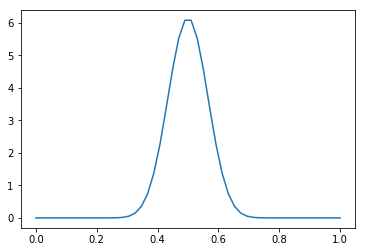

In [9]:
plt.plot(
    beta_linspace, 
    beta.pdf(beta_linspace, 30, 30)
)
plt.show()

A much narrower distribution, due to more evidence we are more certain where the probability of head lies.

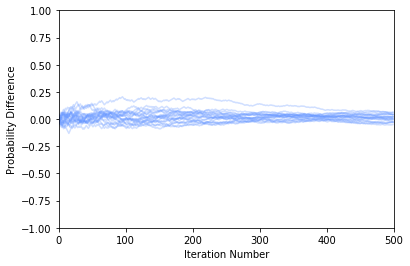

In [10]:
# Run the simulation
for _ in range(20):
    tosses = np.random.binomial(1, 0.5, n_samples)
    difference = np.array([])
    for val in tosses:
        if val == 1:
            alpha_param += 1
        else:
            beta_param += 1
        prob_head = alpha_param / (alpha_param + beta_param)
        prob_differnce = prob_head - (1 - prob_head)
        difference = np.append(difference, [prob_differnce])
    alpha_param, beta_param = 30, 30
    plt.plot(np.arange(n_samples), difference, 'k', alpha=0.3, color='#6596ff')
        
plt.ylim([-1, 1])
plt.xlim([0, n_samples])
plt.xlabel('Iteration Number')
plt.ylabel('Probability Difference')
plt.show()

Much less fluctuation with stronger priors even at the beginning of the simulation

Let's take this one step further and provide even stronger priors by setting both the alpha and beta params to 100

In [11]:
alpha_param, beta_param = 100, 100
# mean should be 0.5
mean, var = beta.stats(alpha_param, beta_param)
mean

array(0.5)

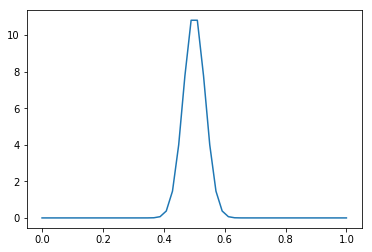

In [12]:
plt.plot(
    beta_linspace, 
    beta.pdf(beta_linspace, alpha_param, beta_param)
)
plt.show()

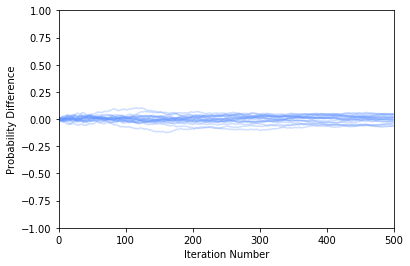

In [13]:
# Run the simulation
for _ in range(20):
    tosses = np.random.binomial(1, 0.5, n_samples)
    difference = np.array([])
    for val in tosses:
        if val == 1:
            alpha_param += 1
        else:
            beta_param += 1
        prob_head = alpha_param / (alpha_param + beta_param)
        prob_differnce = prob_head - (1 - prob_head)
        difference = np.append(difference, [prob_differnce])
    alpha_param, beta_param = 100, 100
    plt.plot(np.arange(n_samples), difference, 'k', alpha=0.3, color='#6596ff')
        
plt.ylim([-1, 1])
plt.xlim([0, n_samples])
plt.xlabel('Iteration Number')
plt.ylabel('Probability Difference')
plt.show()

Very stable paths, this is because with a more informed prior it takes and increased amount of evidence to alter the path.

Below I have plotted the starting beta distributions for our three simulations, as you can see with an increased amount of starting evidence the beta distribution becomes narrower, implying there is more certainty on the range of probabilities a value of heads can take.

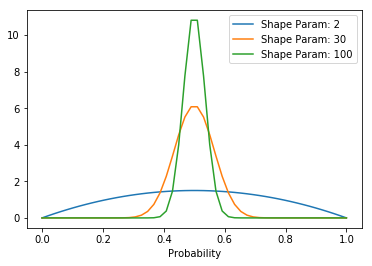

In [14]:
for shape_param in [2, 30, 100]:
    plt.plot(
        beta_linspace, 
        beta.pdf(beta_linspace, shape_param, shape_param),
        label=f'Shape Param: {shape_param}'
    )
plt.legend()
plt.xlabel('Probability')
plt.show()

### Posterior Beta Distributions

Below are plots of what the beta distributions look like after the simulations have finished. Each plot also contains a beta distribution coloured with a black line. This is the starting distribution for all the experiments. 

#### Beta Params: 2

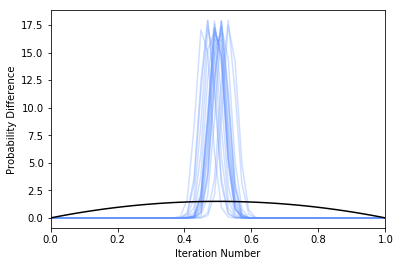

In [15]:
# Run the simulation
alpha_param, beta_param = 2, 2
for _ in range(20):
    tosses = np.random.binomial(1, 0.5, n_samples)
    for val in tosses:
        if val == 1:
            alpha_param += 1
        else:
            beta_param += 1
        difference = np.append(difference, [prob_differnce])
    plt.plot(beta_linspace, beta.pdf(beta_linspace, alpha_param, beta_param), 'k', alpha=0.3, color='#6596ff')
    alpha_param, beta_param = 2, 2

plt.plot(beta_linspace, beta.pdf(beta_linspace, 2, 2), 'k', color='black')
plt.xlim([0, 1])
plt.xlabel('Iteration Number')
plt.ylabel('Probability Difference')
plt.show()

#### Beta Params: 30

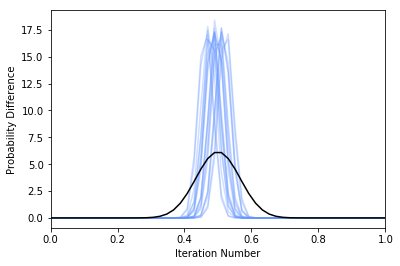

In [16]:
# Run the simulation
alpha_param, beta_param = 30, 30
for _ in range(20):
    tosses = np.random.binomial(1, 0.5, n_samples)
    for val in tosses:
        if val == 1:
            alpha_param += 1
        else:
            beta_param += 1
        difference = np.append(difference, [prob_differnce])
    plt.plot(beta_linspace, beta.pdf(beta_linspace, alpha_param, beta_param), 'k', alpha=0.3, color='#6596ff')
    alpha_param, beta_param = 2, 2

plt.plot(beta_linspace, beta.pdf(beta_linspace, 30, 30), 'k', color='black')
plt.xlim([0, 1])
plt.xlabel('Iteration Number')
plt.ylabel('Probability Difference')
plt.show()

#### Beta Params: 100

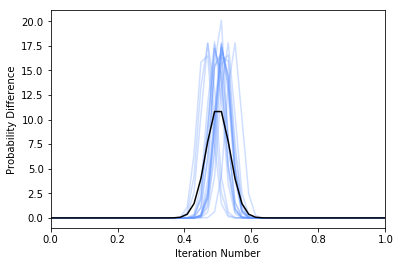

In [17]:
# Run the simulation
alpha_param, beta_param = 100, 100
for _ in range(20):
    tosses = np.random.binomial(1, 0.5, n_samples)
    for val in tosses:
        if val == 1:
            alpha_param += 1
        else:
            beta_param += 1
        difference = np.append(difference, [prob_differnce])
    plt.plot(beta_linspace, beta.pdf(beta_linspace, alpha_param, beta_param), 'k', alpha=0.3, color='#6596ff')
    alpha_param, beta_param = 2, 2

plt.plot(beta_linspace, beta.pdf(beta_linspace, 100, 100), 'k', color='black')
plt.xlim([0, 1])
plt.xlabel('Iteration Number')
plt.ylabel('Probability Difference')
plt.show()

As you can see when there is little evidence (beta param: 2), adding evidence actually shrinks the width of the distribution compared to the starting distribution. With little evidence these beta distributions like the frequentist approach, are also highly variable. However, comparing this to beta param: 100 we can see that the starting distribution is almost identical to the final beta distributions when the experiment has finished, meaning that these beta distributions are less variable and require more evidence for them to change.